# AI & Language Models: Teaching Recap

## ✅ Session 1: Introduction to AI, ML, DL, and Generative AI

### 🔹 Core Definitions
- **Artificial Intelligence (AI):** Machines mimicking human behavior.
- **Machine Learning (ML):** Subset of AI that learns from data to make decisions or predictions.
- **Deep Learning (DL):** Subset of ML using neural networks to handle complex tasks.
- **Generative AI (GenAI):** AI that creates new content—text, images, audio, video, or code.

### 🔹 Learning Types
- **Supervised Learning:** Uses labeled data (input + output).
- **Unsupervised Learning:** Uses unlabeled data to find hidden patterns.

### 🔹 Generative vs Discriminative Models
- **Discriminative Models:** Learn boundaries between classes (`P(y|x)`).
- **Generative Models:** Learn how data is generated (`P(x, y)` or `P(x)`).

### 🔹 Why Generative AI?
- Builds strong internal representations.
- Uses pretraining → then fine-tuning.
- Better initialization = better results.



## ✅ Session 2: Transfer Learning and Transformers

### 🔹 Pretrained Models vs Transfer Learning

| Feature | Pretrained Models | Transfer Learning |
|--------|--------------------|-------------------|
| Use for prediction? | ✅ Yes | 🚫 Not directly |
| Train on new tasks? | 🚫 No | ✅ Yes |
| Layers frozen? | ❌ No | ✅ Often |
| Final layer changed? | ❌ No | ✅ Yes |
| Goal | Direct inference | Task adaptation |

### 🔹 Transformer Concepts
- **Self-Attention:** Each token attends to others in sequence.
- **Positional Encoding:** Adds order info to tokens.
- **Multi-head Attention, Residuals, Normalization**

### 🔹 Architecture
- **Encoder:** Self-attention + Feed Forward layers.
- **Decoder:** Cross-attention + Encoder outputs.
- Enables **parallelism** unlike RNNs.



---
# 🚀 Project Setup Instructions

Follow the steps below to set up your project environment.

---

## 1️⃣ Create and Clone the GitHub Repository

1. Go to [GitHub](https://github.com/) and create a new repository.
2. Open your terminal and run:

```bash
# Replace with your GitHub repo URL
git clone https://github.com/your-username/your-repo-name.git
cd your-repo-name
```



# 2️⃣ Create and Activate a Conda Virtual Environment
1. Create a new conda environment:

```bash
# Replace 'myenv' with the name you want
conda create -n myenv python=3.11
```
2. Activate the environment:

```bash
conda activate myenv
```

## How to upload on a github

```bash
git add name_of_file
git commit -m "desc"
git push
```

In [ ]:
# conda --version

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [49]:
# Load cifar10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [32]:
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:200]
y_test = y_test[:200]

In [33]:
y_test.shape

(200, 1)

In [34]:
# Resize images to match VGG16 expected input size
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

In [35]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [36]:
y_test.shape

(200, 10)

In [37]:
# Define the model and share layers with VGG16
vgg_model=tf.keras.applications.vgg16.VGG16()
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Add layers in Sequential model without last layer

model=tf.keras.models.Sequential()

for layer in vgg_model.layers[:-1]:
    model.add(layer)

In [39]:
# freezing the layers in a neural network model
for layer in model.layers:
    layer.trainable=False

In [40]:
# Add output layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,301,514 (512.32 MB)

 Trainable params: 40,970 (160.04 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [41]:
# Compile model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4)


Epoch 1/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.3119 - loss: 2.2633 - val_accuracy: 0.5500 - val_loss: 1.2309
Epoch 2/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.7582 - loss: 0.7054 - val_accuracy: 0.6200 - val_loss: 1.1537
Epoch 3/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.8484 - loss: 0.4489 - val_accuracy: 0.6400 - val_loss: 1.1162
Epoch 4/4
32/32 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - accuracy: 0.9157 - loss: 0.2970 - val_accuracy: 0.6300 - val_loss: 1.3103


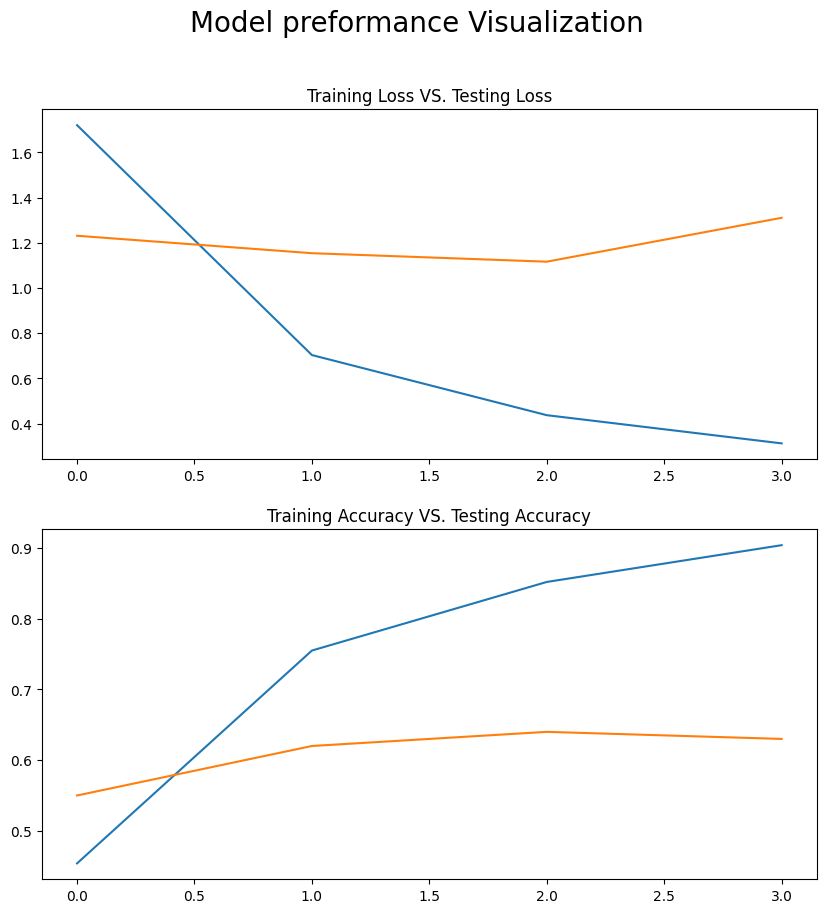

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle("Model preformance Visualization",fontsize=20)
ax[0].plot(model.history.history['loss'],label='Training Loss')
ax[0].plot(model.history.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model.history.history['accuracy'],label='Training Accuracy')
ax[1].plot(model.history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()




## Text Generation

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load pre-trained model and tokenizer
model_name = "gpt2"  
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, you might encounter them in battle, but they are completely harmless.

Cantrip is a type of undead. It is an undead creature created by a mage with the use of Conjuration (Dire Wisps) or Summon (


In [10]:
# Prompt
prompt = "define a function to calculate the factorial of a number in Python."
inputs = tokenizer(prompt, return_tensors="pt").to(device)

# Generate text
outputs = model.generate(**inputs, max_new_tokens=50, do_sample=True)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


define a function to calculate the factorial of a number in Python. A simple example of what this does:

def get_matches ( self ): for row , col in self . count (): if row : return ( 'A' , col [row: row]] else : return $ row * col


## Sentiment Analysis

In [6]:
from transformers import pipeline

# Initialize a text classification pipeline with a pre-trained BERT model
classifier = pipeline('sentiment-analysis')

# Classify the sentiment of the sentence
result = classifier("I love ice cream!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'POSITIVE', 'score': 0.9998527765274048}]


## Text Translation

In [7]:
from transformers import pipeline

# Initialize a translation pipeline with T5
translator = pipeline('translation_en_to_fr', model='t5-base')

# Translate text from English to French
result = translator("Transformers are amazing!", max_length=40)
print(result[0]['translation_text'])


Device set to use mps:0


Les transformateurs sont fantastiques !


## Q&A

In [ ]:
from transformers import pipeline

model_name = "distilbert/distilbert-base-cased-distilled-squad"

 # Question answering pipeline, specifying the checkpoint identifier
oracle = pipeline(
    "question-answering",
        model=model_name,
        tokenizer=model_name
    )

# Run question answering
context = "The Eiffel Tower is located in Paris and was completed in 1889."
question = "Where is the Eiffel Tower located?"
qa_result = oracle(question=question, context=context)
print("Question Answering Result:")
print(qa_result.answer)



Device set to use mps:0


Question Answering Result:
{'score': 0.9905520677566528, 'start': 31, 'end': 36, 'answer': 'Paris'}
